In [122]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

In [27]:
url = 'https://www.nationsonline.org/oneworld/IATA_Codes/airport_code_list.htm'
def load_data_from_url(url):
    html = requests.get(url).content
    df_list = pd.read_html(html)
    df = pd.DataFrame()
    columns={0:'City', 1:'Country', 2:'IATA Code'}
    for i in df_list:
        df = df.append(i)
    df = df.rename(columns=columns)
    df = df.reindex()
    df = df.dropna()
    return df

In [197]:
file_name = 'GlobalAirportDatabase/GlobalAirportDatabase.txt'
columns = ['ICAO Code', 'IATA Code', 'Airport Name', 'City/Town', 'Country', 'Latitude Degree'
              , 'Latitude Minutes', 'Latitude Seconds', 'Latitude Direction', 'Longitude Degree'
              , 'Longitude Minutes', 'Longitudes Seconds', 'Longitude Direction', 'Altitude'
              , 'Latitude Decimal Degrees', 'Longitude Decimal Degrees']
def load_txt_file(file_name, columns, delimiter):
    data = pd.read_csv(file_name , delimiter=delimiter, names= columns)
    return data

In [29]:
import plotly.express as px
df = px.data.gapminder().query("year == 2007")
fig = px.line_geo(df, locations="iso_alpha",
                  color="continent", # "continent" is one of the columns of gapminder
                  projection="orthographic")
fig.show()

In [56]:
columns = ['Airline', 'Airline ID', 'Source airport', 'Source airport ID', 'Destination airport'
           , 'Destination airport ID', 'Codeshare', 'Stops', 'Equipment']
data = load_txt_file('routes.dat.txt', columns, delimiter=',')

In [ ]:
"""
    https://openflights.org/data.html#route
    Airline	2-letter (IATA) or 3-letter (ICAO) code of the airline.
    Airline ID	Unique OpenFlights identifier for airline (see Airline).
    Source airport	3-letter (IATA) or 4-letter (ICAO) code of the source airport.
    Source airport ID	Unique OpenFlights identifier for source airport (see Airport)
    Destination airport	3-letter (IATA) or 4-letter (ICAO) code of the destination airport.
    Destination airport ID	Unique OpenFlights identifier for destination airport (see Airport)
    Codeshare	"Y" if this flight is a codeshare (that is, not operated by Airline, but another carrier), empty otherwise.
    Stops	Number of stops on this flight ("0" for direct)
    Equipment	3-letter codes for plane type(s) generally used on this flight, separated by spaces
"""

In [76]:
# data[data['Source airport'] == 'ISB']
airports = ['BGI', 'CDG', 'DEL', 'DOH', 'DSM', 'EWR', 'EYW', 'HND', 'ICN'
            , 'JFK', 'LGA', 'LHR', 'ORD', 'SAN', 'SFO', 'SIN', 'TLV', 'BUD']
routes = [
    ["DSM", "ORD"],
    ["ORD", "BGI"],
    ["BGI", "LGA"],
    ["SIN", "CDG"],
    ["CDG", "SIN"],
    ["CDG", "BUD"],
    ["DEL", "DOH"],
    ["DEL", "CDG"],
    ["TLV", "DEL"],
    ["EWR", "HND"],
    ["HND", "ICN"],
    ["HND", "JFK"],
    ["ICN", "JFK"],
    ["JFK", "LGA"],
    ["EYW", "LHR"],
    ["LHR", "SFO"],
    ["SFO", "SAN"],
    ["SFO", "DSM"],
    ["SAN", "EYW"],
]
starting_point = 'LGA'

In [89]:
# Python implementation of Kosaraju's algorithm to print all SCCs 
  
from collections import defaultdict 
   
#This class represents a directed graph using adjacency list representation 
class Graph: 
   
    def __init__(self,vertices): 
        self.V= vertices #No. of vertices 
        self.graph = defaultdict(list) # default dictionary to store graph 
   
    # function to add an edge to graph 
    def addEdge(self,u,v): 
        self.graph[u].append(v) 
   
    # A function used by DFS 
    def DFSUtil(self,v,visited): 
        # Mark the current node as visited and print it 
        visited[v]= True
        print (v), 
        #Recur for all the vertices adjacent to this vertex 
        for i in self.graph[v]: 
            if visited[i]==False: 
                self.DFSUtil(i,visited) 
  
  
    def fillOrder(self,v,visited, stack): 
        # Mark the current node as visited  
        visited[v]= True
        #Recur for all the vertices adjacent to this vertex 
        for i in self.graph[v]: 
            if visited[i]==False: 
                self.fillOrder(i, visited, stack) 
        stack = stack.append(v) 
      
  
    # Function that returns reverse (or transpose) of this graph 
    def getTranspose(self): 
        g = Graph(self.V) 
  
        # Recur for all the vertices adjacent to this vertex 
        for i in self.graph: 
            for j in self.graph[i]: 
                g.addEdge(j,i) 
        return g 
  
   
   
    # The main function that finds and prints all strongly 
    # connected components 
    def printSCCs(self): 
          
        stack = [] 
        # Mark all the vertices as not visited (For first DFS) 
        visited =[False]*(self.V) 
        # Fill vertices in stack according to their finishing 
        # times 
        for i in range(self.V): 
            if visited[i]==False: 
                self.fillOrder(i, visited, stack) 
  
        # Create a reversed graph 
        gr = self.getTranspose() 
           
         # Mark all the vertices as not visited (For second DFS) 
        visited =[False]*(self.V) 
  
         # Now process all vertices in order defined by Stack 
        while stack: 
            i = stack.pop() 
            if visited[i]==False: 
                gr.DFSUtil(i, visited) 
                print("--------") 

In [90]:
# Create a graph given in the above diagram 
g = Graph(5)
g.addEdge(1, 0) 
g.addEdge(0, 2) 
g.addEdge(2, 1) 
g.addEdge(0, 3) 
g.addEdge(3, 4) 

graph = Graph(len(routes))
for route in routes:
#     graph.addEdge(route[0], route[1])
    print(route[0])

DSM
ORD
BGI
SIN
CDG
CDG
DEL
DEL
TLV
EWR
HND
HND
ICN
JFK
EYW
LHR
SFO
SFO
SAN


In [92]:
print ("Following are strongly connected components " +
                           "in given graph") 
graph.printSCCs() 

Following are strongly connected components in given graph
18
--------
17
--------
16
--------
15
--------
14
--------
13
--------
12
--------
11
--------
10
--------
9
--------
8
--------
7
--------
6
--------
5
--------
4
--------
3
--------
2
--------
1
--------
0
--------


In [78]:
from collections import Counter

In [80]:
Counter([i[0] for i in routes])

Counter({'DSM': 1,
         'ORD': 1,
         'BGI': 1,
         'SIN': 1,
         'CDG': 2,
         'DEL': 2,
         'TLV': 1,
         'EWR': 1,
         'HND': 2,
         'ICN': 1,
         'JFK': 1,
         'EYW': 1,
         'LHR': 1,
         'SFO': 2,
         'SAN': 1})

In [108]:
i = 1
airport_set = set(airports)
air_port_map = { iata[0]:iata[1] for iata in zip( airport_set , range(len(airport_set)) )}

In [112]:
air_port_map.get('LHR')

15

In [115]:
air_port_map.keys()[list(air_port_map.values()).index(15)]

TypeError: 'dict_keys' object does not support indexing

In [191]:
# https://networkx.github.io/documentation/networkx-1.10/reference/generated/networkx.DiGraph.add_edge.html
import networkx as nx
G = nx.DiGraph()
for route in routes:
    G.add_edge(route[0], route[1])
# nx.shortest_path(G, 'A', 'D', weight='weight')
G.add_edge('DEL', 'DSM', weights = 10)
G.add_edge('CDG', 'DSM', weights = 1)

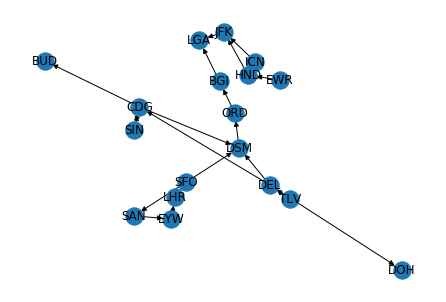

In [192]:
nx.draw(G, with_labels = True)
plt.show()

In [194]:
nx.shortest_path(G, 'DEL', 'DSM')

['DEL', 'DSM']

In [195]:
paths = nx.all_simple_paths(G, source='DEL', target='DSM')

In [196]:
for i in paths:
    print(i)

['DEL', 'CDG', 'DSM']
['DEL', 'DSM']


In [198]:
data = load_txt_file(file_name, columns, ":")

In [199]:
data

,ICAO Code,IATA Code,Airport Name,City/Town,Country,Latitude Degree,Latitude Minutes,Latitude Seconds,Latitude Direction,Longitude Degree,Longitude Minutes,Longitudes Seconds,Longitude Direction,Altitude,Latitude Decimal Degrees,Longitude Decimal Degrees
0,AYGA,GKA,GOROKA,GOROKA,PAPUA NEW GUINEA,6,4,54,S,145,23,30,E,1610,-6.082,145.392
1,AYLA,LAE,NaN,LAE,PAPUA NEW GUINEA,0,0,0,U,0,0,0,U,0,0.000,0.000
2,AYMD,MAG,MADANG,MADANG,PAPUA NEW GUINEA,5,12,25,S,145,47,19,E,7,-5.207,145.789
3,AYMH,HGU,MOUNT HAGEN,MOUNT HAGEN,PAPUA NEW GUINEA,5,49,34,S,144,17,46,E,1643,-5.826,144.296
4,AYNZ,LAE,NADZAB,NADZAB,PAPUA NEW GUINEA,6,34,11,S,146,43,34,E,73,-6.570,146.726
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9295,ZYTK,NaN,NaN,SHENYANG,CHINA,0,0,0,U,0,0,0,U,0,0.000,0.000
9296,ZYTL,DLC,ZHOUSHUIZI,DALIAN,CHINA,38,57,56,N,121,32,18,E,33,38.966,121.538
9297,ZYXC,NaN,NaN,XIANCHENG,CHINA,0,0,0,U,0,0,0,U,0,0.000,0.000
9298,ZYYC,NaN,NaN,YICHUN,CHINA,0,0,0,U,0,0,0,U,0,0.000,0.000


In [201]:
import pusher

pusher_client = pusher.Pusher(
  app_id='1011567',
  key='b9fc3861a24530d80886',
  secret='06ded541242e46fdae59',
  cluster='ap2',
  ssl=True
)

pusher_client.trigger('my-channel', 'my-event', {'message': 'hello world'})

ImportError: libffi.so.6: cannot open shared object file: No such file or directory